# Wine Quality Data Analysis

## Introduction

When it comes to making wine, there are makers who consider it a form of art as to how creative you can get with altering the chemical compounds and ingredients to create different tastes. For this dataset on the qualities of wine and their chemical levels used, i'll be doing a data analysis to find specific metrics that may alter the wine and boost the overall quality of it. 

In the sample, i'll be looking at the attributes of both red and white wines and trying to answer some questions. 

The datasets were sourced from UCI's Machine Learning database and can downloaded from:

* https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
* https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv

## Data and library imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Create 2 dataframes for the datasets
red_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',
                    sep = ';')
white_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv',
                      sep = ';')

In [3]:
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
# Verifying columns are the same between red and white wines
red_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
# Verifying columns are the same between red and white wines
white_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
# The size of datasets
print("Red Wine dataset has {} samples\n\nWhite Wine dataset has {} samples".
      format(red_df.shape[0], white_df.shape[0]))

Red Wine dataset has 1599 samples

White Wine dataset has 4898 samples


In [8]:
# Columns
print("Red Wine dataset has {} columns\n\nWhite Wine dataset has {} columns".
      format(red_df.shape[1], white_df.shape[1]))

Red Wine dataset has 12 columns

White Wine dataset has 12 columns


In [9]:
# Check to see if there are any NaN values
print("Missing values in Red Wine dataset:\n\n{}\n\nMissing values in White Wine dataset:\n\n{}".
      format(red_df.isna().sum() , white_df.isna().sum()))

Missing values in Red Wine dataset:

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Missing values in White Wine dataset:

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [10]:
# Check to see if there are any duplicates within the data
print("Red Wine dataset has {} duplicated values\n\nWhite Wine dataset has {} duplicated values".
      format(red_df.duplicated().sum() , white_df.duplicated().sum()))

Red Wine dataset has 240 duplicated values

White Wine dataset has 937 duplicated values


In [11]:
# Print out duplicate entries
red_df[red_df.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [12]:
# Drop all subsequent duplicate entries
red_df = red_df.drop_duplicates(keep='last')
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [13]:
# Check to see if there are any duplicates within the data
print("Red Wine dataset has {} duplicated values\n\nWhite Wine dataset has {} duplicated values".
      format(red_df.duplicated().sum() , white_df.duplicated().sum()))

Red Wine dataset has 0 duplicated values

White Wine dataset has 937 duplicated values


In [14]:
# Print out duplicate entries
white_df[white_df.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6
20,6.2,0.66,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.800000,8
...,...,...,...,...,...,...,...,...,...,...,...,...
4828,6.4,0.23,0.35,10.3,0.042,54.0,140.0,0.99670,3.23,0.47,9.200000,5
4850,7.0,0.36,0.35,2.5,0.048,67.0,161.0,0.99146,3.05,0.56,11.100000,6
4851,6.4,0.33,0.44,8.9,0.055,52.0,164.0,0.99488,3.10,0.48,9.600000,5
4856,7.1,0.23,0.39,13.7,0.058,26.0,172.0,0.99755,2.90,0.46,9.000000,6


In [15]:
# Drop all subsequent duplicate entries
white_df = white_df.drop_duplicates(keep='last')
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6


In [16]:
# Check to see if all duplicates have been dropped
print("Red Wine dataset has {} duplicated values\n\nWhite Wine dataset has {} duplicated values".
      format(red_df.duplicated().sum() , white_df.duplicated().sum()))

Red Wine dataset has 0 duplicated values

White Wine dataset has 0 duplicated values


In [17]:
# Check to see how many unique values are in both of our datasets
print("Unique values in Red Wine dataset:\n\n{}\n\nUnique values in White Wine dataset:\n\n{}".
      format(red_df.nunique() , white_df.nunique()))

Unique values in Red Wine dataset:

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

Unique values in White Wine dataset:

fixed acidity            68
volatile acidity        125
citric acid              87
residual sugar          310
chlorides               160
free sulfur dioxide     132
total sulfur dioxide    251
density                 890
pH                      103
sulphates                79
alcohol                 103
quality                   7
dtype: int64


In [18]:
red_df.info()
white_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 1 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3961 entries, 4 to 4897
Data columns (total 12 columns):
 #   Column        

In [19]:
# General descriptive statistics on our data of red wine
red_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [20]:
# General descriptive statistics on our data of white wine
white_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000
mean,6.839346,0.280538,0.334332,5.914819,0.045905,34.889169,137.193512,0.993790,3.195458,0.490351,10.589358,5.854835
std,0.866860,0.103437,0.122446,4.861646,0.023103,17.210021,43.129065,0.002905,0.151546,0.113523,1.217076,0.890683
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.600000,0.035000,23.000000,106.000000,0.991620,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,4.700000,0.042000,33.000000,133.000000,0.993500,3.180000,0.480000,10.400000,6.000000
75%,7.300000,0.330000,0.390000,8.900000,0.050000,45.000000,166.000000,0.995710,3.290000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [21]:
# Assign color code to table
red_df['color'] = 'red'
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red


In [22]:
# Assign color code to table
white_df['color'] = 'white'
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,white
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white


In [23]:
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,white
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white


In [24]:
# Combine data together
wine_df = red_df.append(white_df)
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red


In [25]:
# Save dataset and export a copy as a csv file
wine_df.to_csv('winequality_clean.csv', index=False)

# Exploring with Visuals

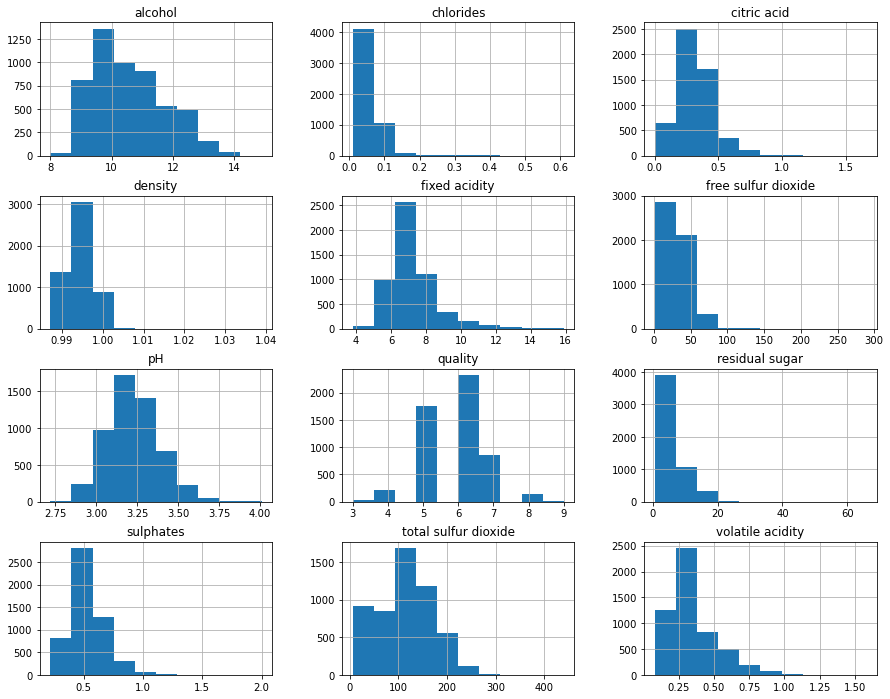

In [26]:
# Histogram visualization
wine_df.hist(figsize=(15,12));

### Based on histograms of columns in this dataset, which of the following feature variables appear skewed to the right? 
* Fixed Acidity, Total Sulfur Dioxide, pH, Alcohol

### Based on scatterplots of quality against different feature variables, which of the following is most likely to have a positive impact on quality? 
* Volatile Acidity, Residual Sugar, pH, Alcohol

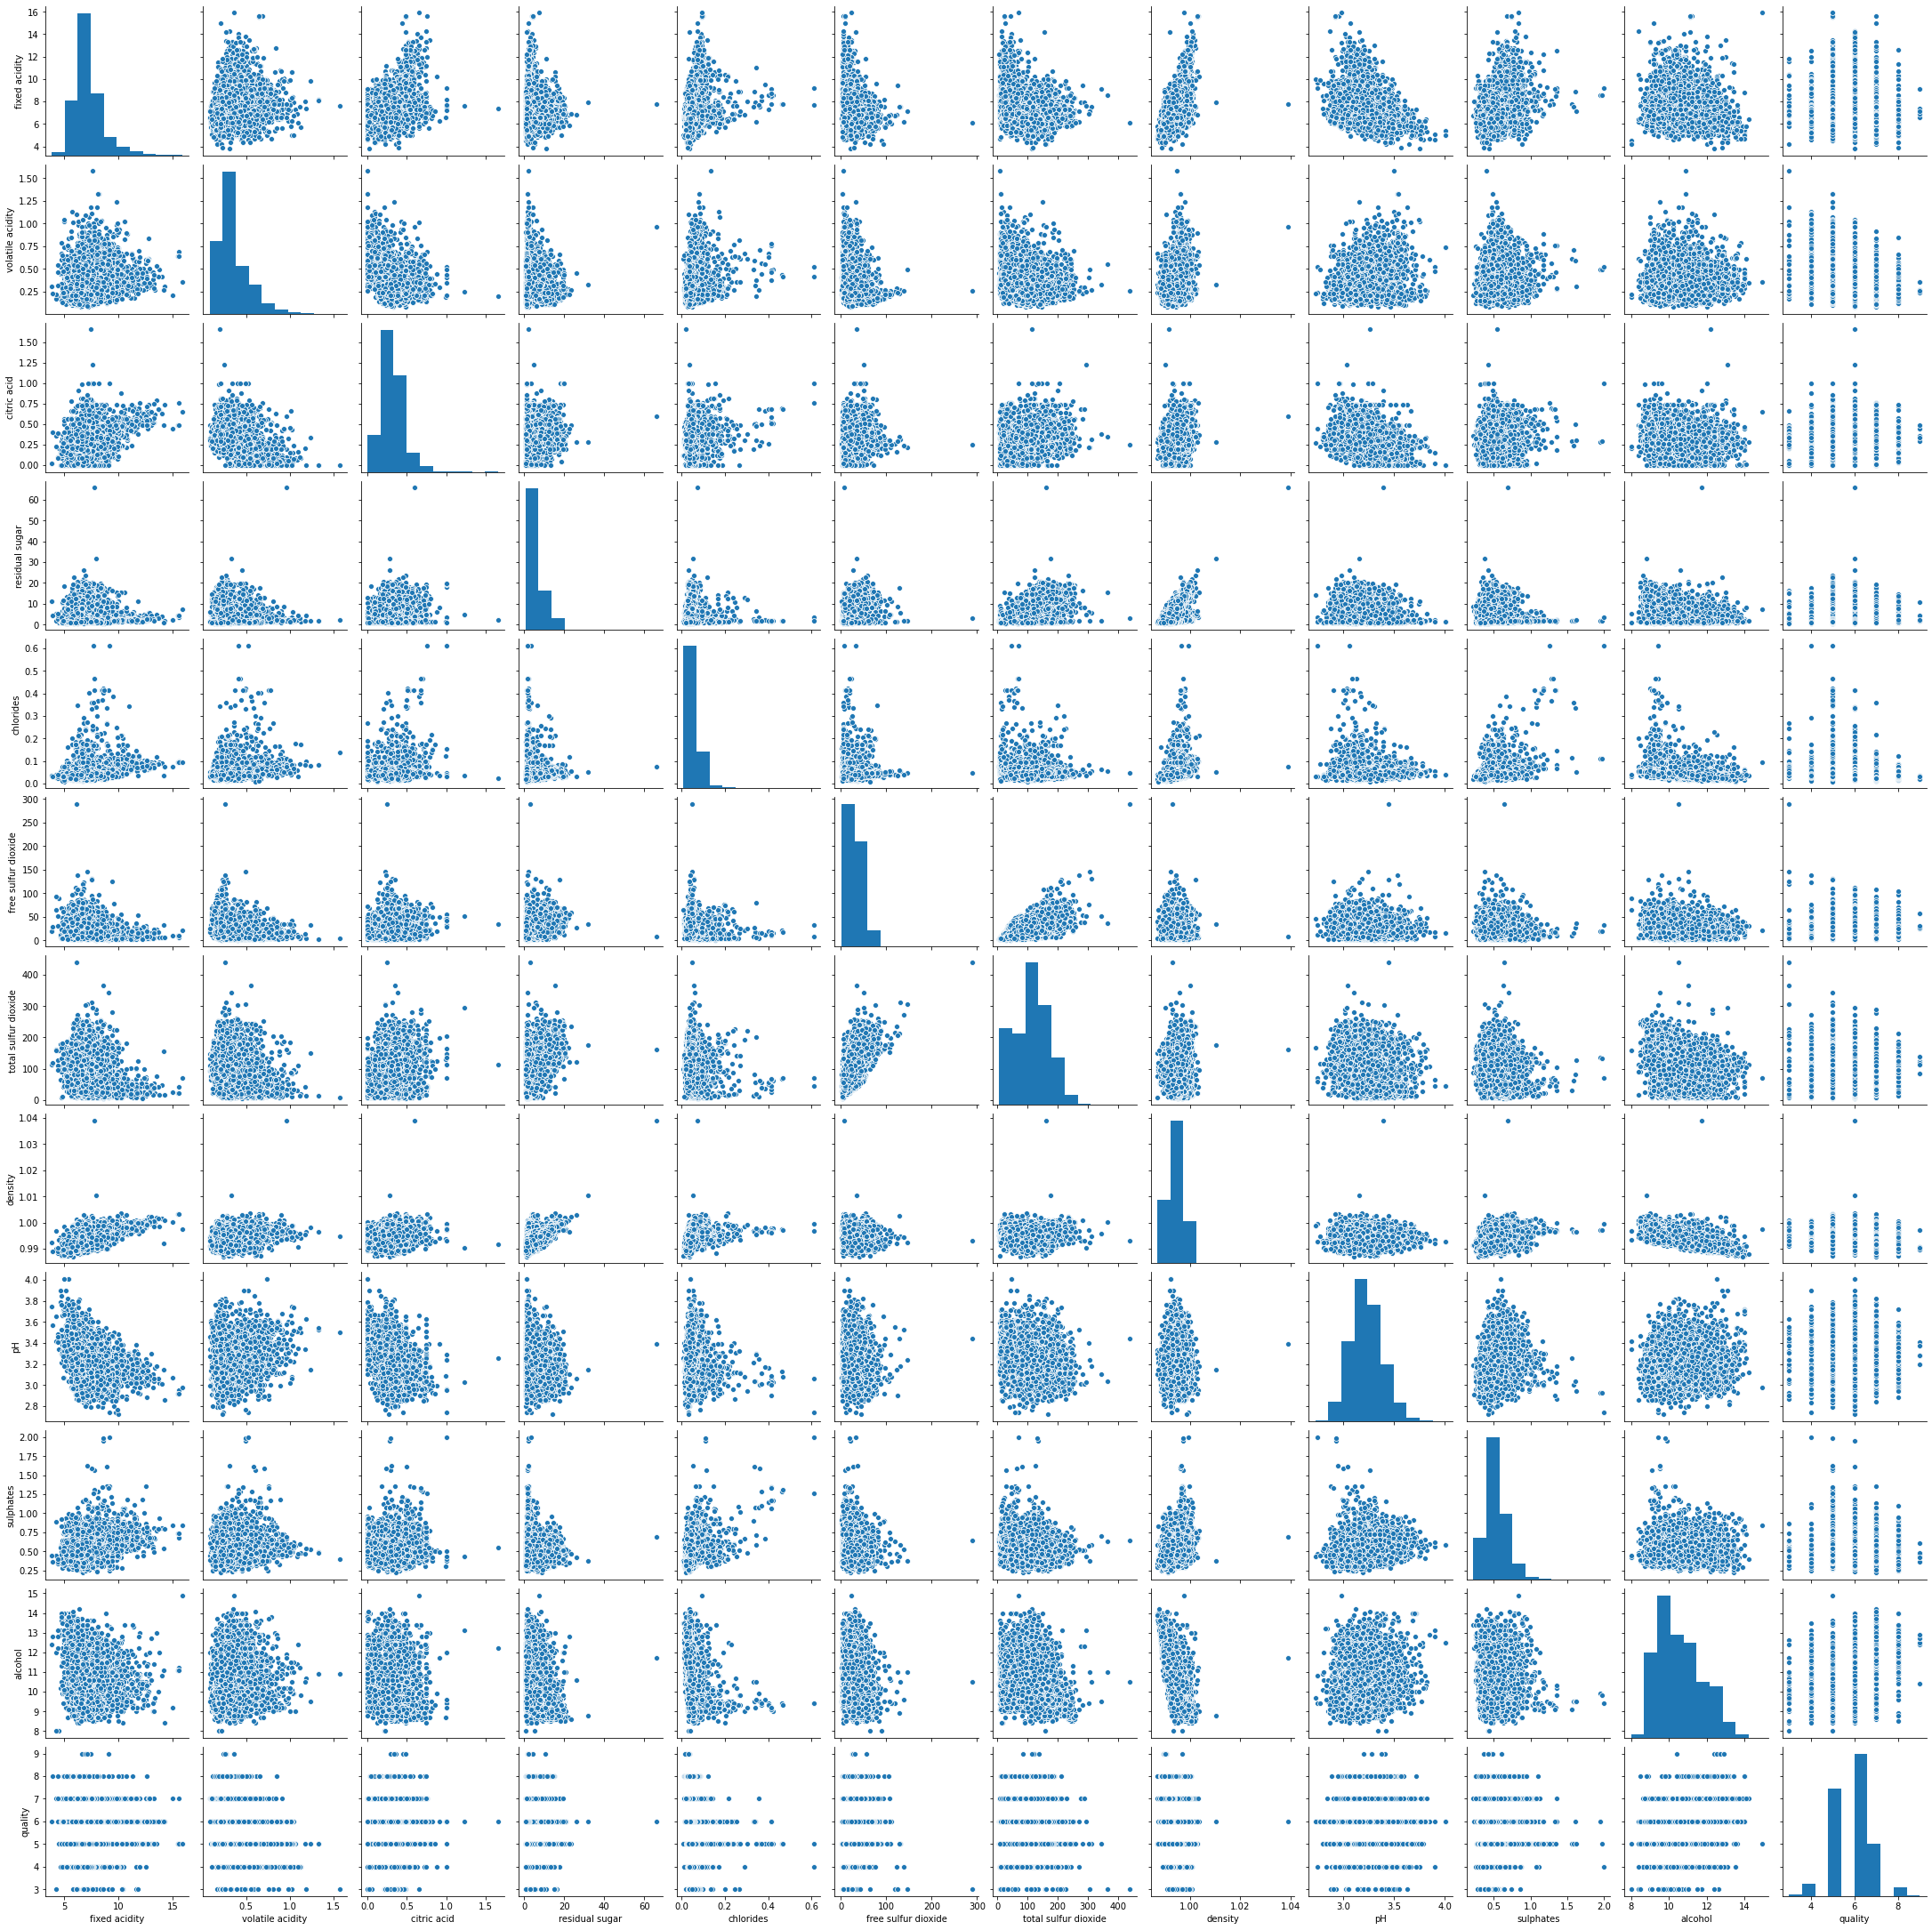

In [27]:
# Distribution of points and their relationship with other variables

sns.pairplot(wine_df)

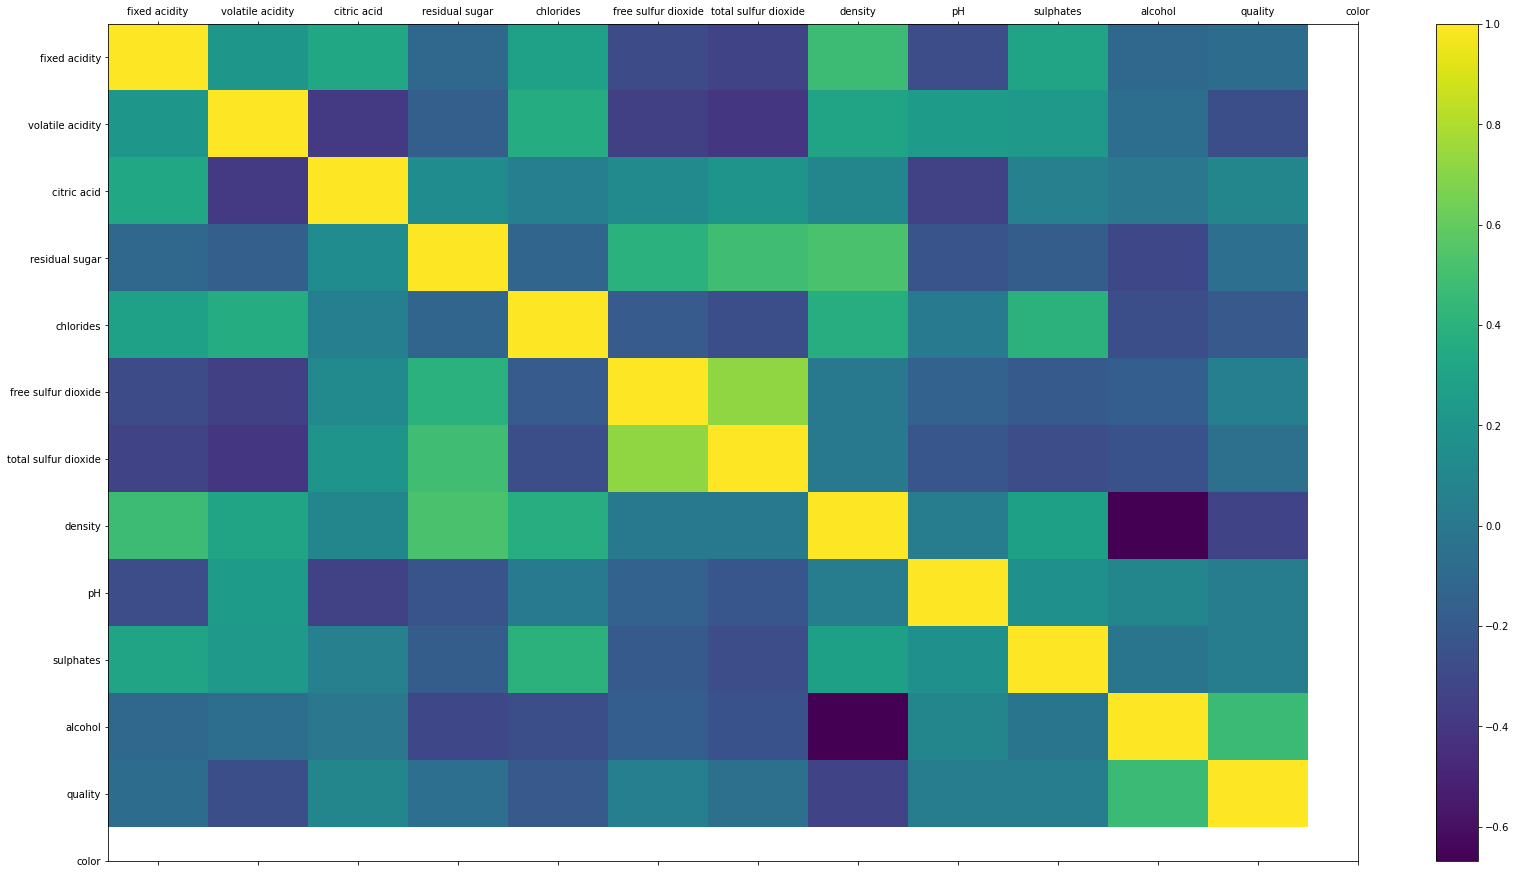

In [28]:
# Correlation matrix plot to see if any attributes have a correlation with each other

plt.figure(figsize=(28,15))
plt.matshow(wine_df.corr(), fignum=1, aspect='auto')
plt.xticks(range(len(wine_df.columns)), wine_df.columns)
plt.yticks(range(len(wine_df.columns)), wine_df.columns)
plt.colorbar()
plt.show()

#### Observation
* Free sulfur dioxide and total sulfur dioxide have the highest correlation together
* There seems to be a moderate correlation between density and residual sugar, density and fixed acidity, total sulfur dioxide and residual sugar, and alcohol and quality. 

### __Is a certain type of wine (red or white) associated with higher quality?__ 

In [29]:
# Get the mean of the quality of each type of wine by color
wine_df.groupby('color').mean().quality

color
red      5.623252
white    5.854835
Name: quality, dtype: float64

### __What level of acidity (pH value) receives the highest average rating?__ 

__Acidity Levels:__

* High: Lowest 25% of pH values
* Moderately High: 25% - 50% of pH values
* Medium: 50% - 75% of pH values
* Low: 75% - max pH value

In [30]:
# View the min, 25%, 50%, 75% and max pH values
wine_df.describe().pH

count    5320.000000
mean        3.224664
std         0.160379
min         2.720000
25%         3.110000
50%         3.210000
75%         3.330000
max         4.010000
Name: pH, dtype: float64

In [31]:
# Bin edges that will be used to cut data into seperate acidity level groups

bin_edges = [2.72, 3.11, 3.21, 3.32, 4.01]

In [32]:
# Labels for the acidity levels group

bin_names = ['high', 'mod_high', 'medium', 'low']

In [33]:
# Create acidity levels column

wine_df['acidity_levels'] = pd.cut(wine_df['pH'], bin_edges, labels=bin_names)
wine_df.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,mod_high
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,medium
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,mod_high
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red,low
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,red,medium
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,red,low
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,red,low
10,6.7,0.580,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,red,medium
11,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red,low


In [34]:
# Mean quality of each acidity level

wine_df.groupby('acidity_levels').mean().quality

acidity_levels
high        5.728024
mod_high    5.766917
medium      5.840183
low         5.847470
Name: quality, dtype: float64

In [35]:
# Export dataframe to a csv
wine_df.to_csv('winequality_transformed.csv', index=False)

### Do wines with higher alcoholic content receive better ratings?

In [36]:
# Median of alcohol levels

wine_df.alcohol.median()

10.4

In [37]:
# Select samples with alcohol content less than and greater or equal than median

low_alcohol = wine_df[wine_df.alcohol < 10.3]

# select samples with alcohol content greater than or equal to the median
high_alcohol = wine_df[wine_df.alcohol >= 10.3]

# ensure these queries included each sample exactly once
num_samples = wine_df.shape[0]
num_samples == low_alcohol['quality'].count() + high_alcohol['quality'].count() # should be True

True

In [38]:
# Get mean quality rating for low and high alcohol groups

low_alcohol.quality.mean(), high_alcohol.quality.mean()

(5.428057553956834, 6.122072391767211)

### Do sweeter wines receive better ratings?
 

In [39]:
# Get median amount of residual sugar

wine_df['residual sugar'].median()

2.7

In [40]:
# Select samples with residual sugar less than and greater or equal to median

low_sugar = wine_df[wine_df['residual sugar'] < 2.7]
high_sugar = wine_df[wine_df['residual sugar'] >= 2.7]

num_samples == low_sugar['quality'].count() + high_sugar['quality'].count() 

True

In [41]:
# Get the 2 means of the different sugar content wines
low_sugar.quality.mean(), high_sugar.quality.mean()

(5.78316032295271, 5.807649871276205)

### Characteristics of the top 5 wines by quality

In [42]:
# Filter data to having a wine quality greater than 9
quality_5 = wine_df['quality'] >= 9
quality_5.value_counts()

False    5315
True        5
Name: quality, dtype: int64

In [43]:
# Display the attributes of those top wines
top_quality = wine_df.iloc[quality_5.values]
top_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
774,9.1,0.27,0.45,10.6,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,9,white,mod_high
820,6.6,0.36,0.29,1.6,0.021,24.0,85.0,0.98965,3.41,0.61,12.4,9,white,low
827,7.4,0.24,0.36,2.0,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,9,white,medium
876,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9,white,medium
1605,7.1,0.26,0.49,2.2,0.032,31.0,113.0,0.99030,3.37,0.42,12.9,9,white,low
